In [0]:
!pip install seaborn==0.9.0

In [0]:
import pandas as pd

In [0]:
uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
from sklearn.cluster import KMeans

In [0]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [2 2 1 ... 1 2 1]


In [0]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  1.77945047  0.55553895 -0.16381415 -0.26630279 -0.36360255
   0.30161844 -0.20993782 -0.28631303  0.07714909 -0.06158693  0.01905363
   0.32268722 -0.17405476 -0.01003755 -0.29857304  0.74304763  0.56544578
   0.15078538  0.05721408]
 [ 0.02425436 -0.47949498 -0.2730736  -0.25211343 -0.27045122  0.06715779
  -0.03984436  0.08495479  0.15795732 -0.139547    0.02967474  0.03096649
  -0.11464877 -0.00628803  0.02003386  0.11884858 -0.21319196 -0.09413105
  -0.01935    -0.00496482]
 [-0.05917995 -0.0987796   0.8968363   2.23664878  2.5878729   0.2519166
  -0.32826065 -0.20176991 -0.59169556  0.88866543 -0.09492563 -0.27250055
   0.19033986  0.40959419 -0.12974119 -0.27211478  0.0562637  -0.46926249
  

In [0]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,1.779450,0.555539,-0.163814,-0.266303,-0.363603,0.301618,-0.209938,-0.286313,0.077149,-0.061587,0.019054,0.322687,-0.174055,-0.010038,-0.298573,0.743048,0.565446,0.150785,0.057214
1,0.024254,-0.479495,-0.273074,-0.252113,-0.270451,0.067158,-0.039844,0.084955,0.157957,-0.139547,0.029675,0.030966,-0.114649,-0.006288,0.020034,0.118849,-0.213192,-0.094131,-0.019350,-0.004965
2,-0.059180,-0.098780,0.896836,2.236649,2.587873,0.251917,-0.328261,-0.201770,-0.591696,0.888665,-0.094926,-0.272501,0.190340,0.409594,-0.129741,-0.272115,0.056264,-0.469262,-0.168383,-0.081767


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c319d4e0>,
      dtype=object)

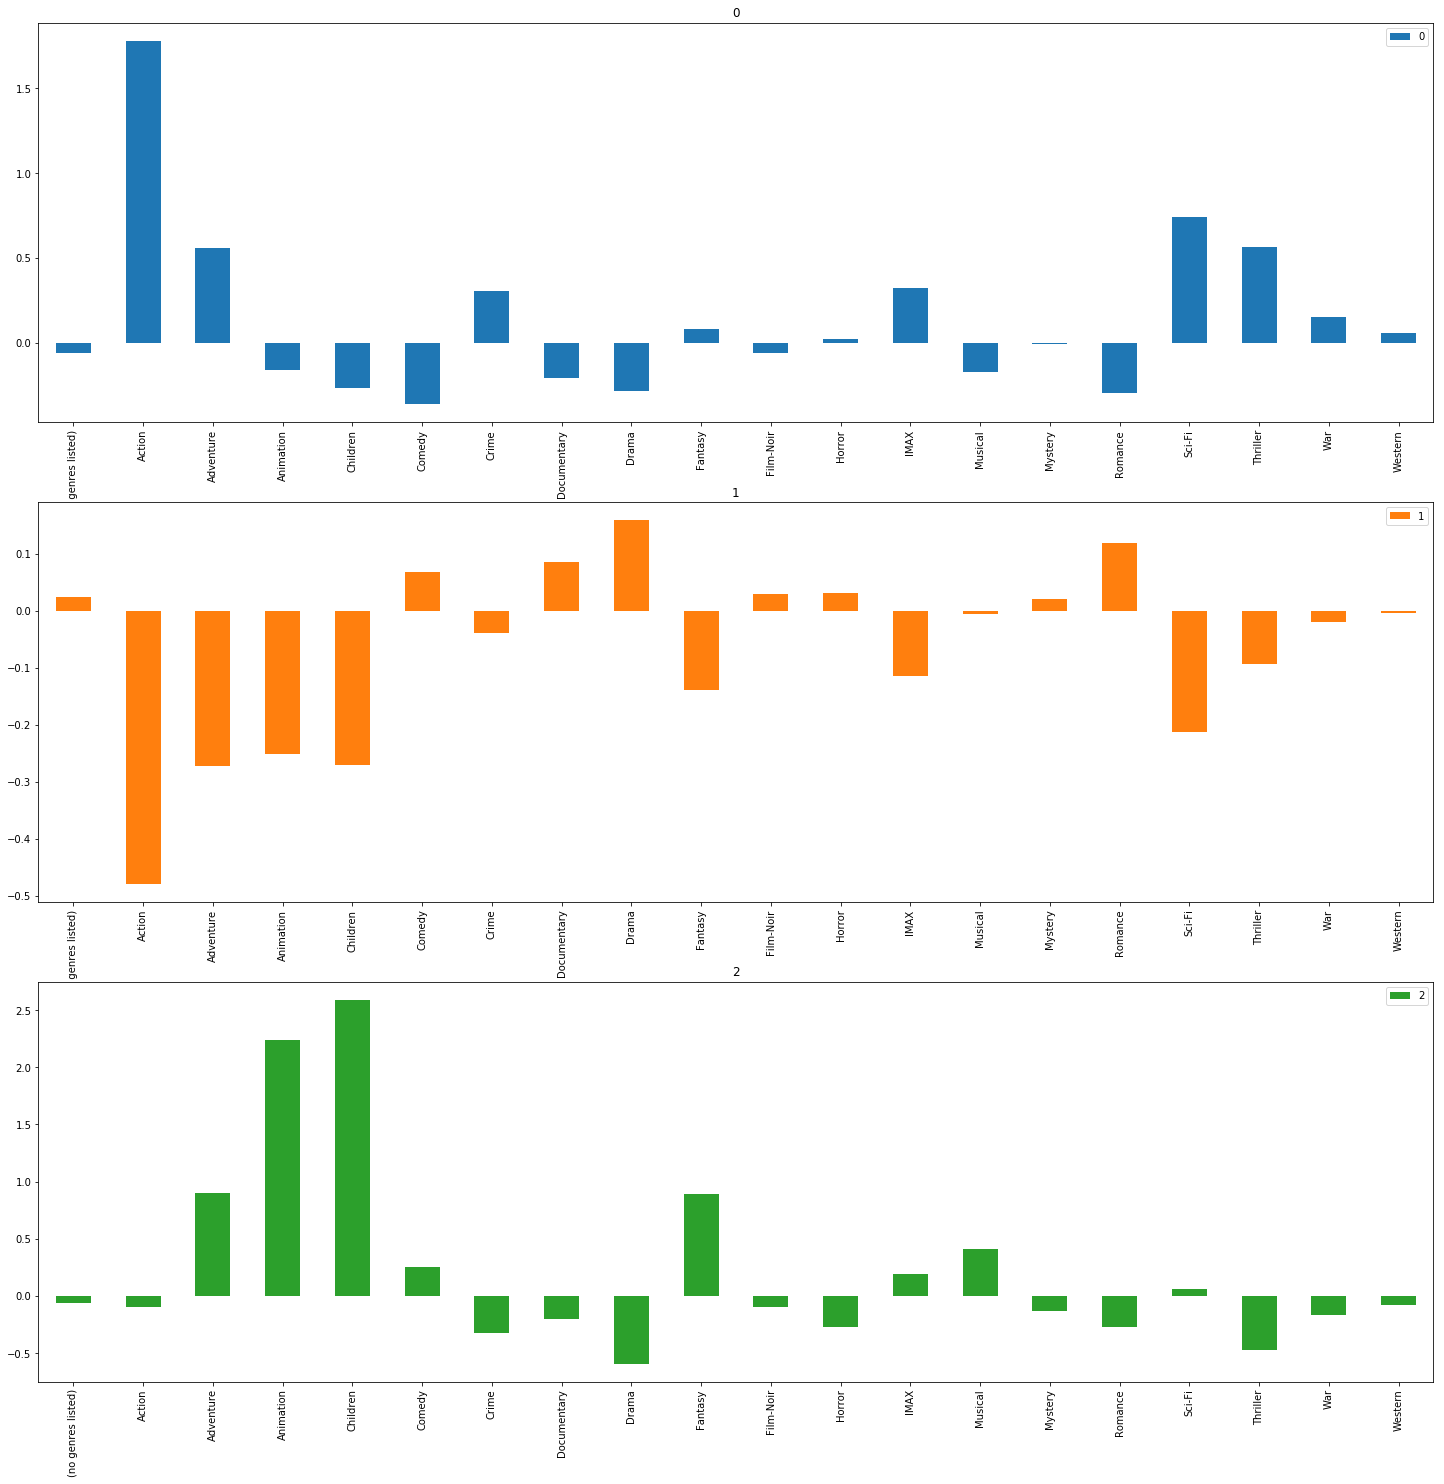

In [0]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [0]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9087,143355,Wonder Woman (2017),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8894,134775,Dragon Blade (2015),Action|Adventure|Drama,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8166,102716,"Fast & Furious 6 (Fast and the Furious 6, The)...",Action|Crime|Thriller|IMAX,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8295,106487,The Hunger Games: Catching Fire (2013),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6522,54001,Harry Potter and the Order of the Phoenix (2007),Adventure|Drama|Fantasy|IMAX,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6374,50003,DOA: Dead or Alive (2006),Action|Adventure,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3390,4613,K-9 (1989),Action|Comedy|Crime,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9222,152079,London Has Fallen (2016),Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6508,53519,Death Proof (2007),Action|Adventure|Crime|Horror|Thriller,0,1,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
8786,129397,Marvel One-Shot: Item 47 (2012),Action|Fantasy|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [0]:
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-57.61197   , -20.176783  ],
       [ 57.980183  ,   4.617795  ],
       [-46.436092  ,  -0.67735666],
       ...,
       [  9.0941305 ,   7.6219196 ],
       [ 34.448307  ,  -9.311135  ],
       [-26.533556  , -16.973427  ]], dtype=float32)

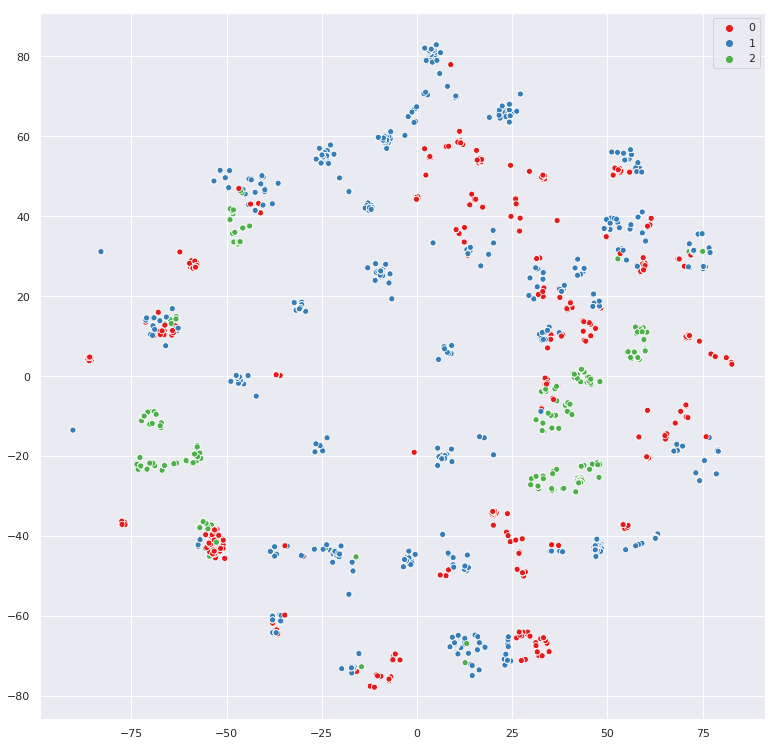

In [0]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5c05829e8>,
      dtype=object)

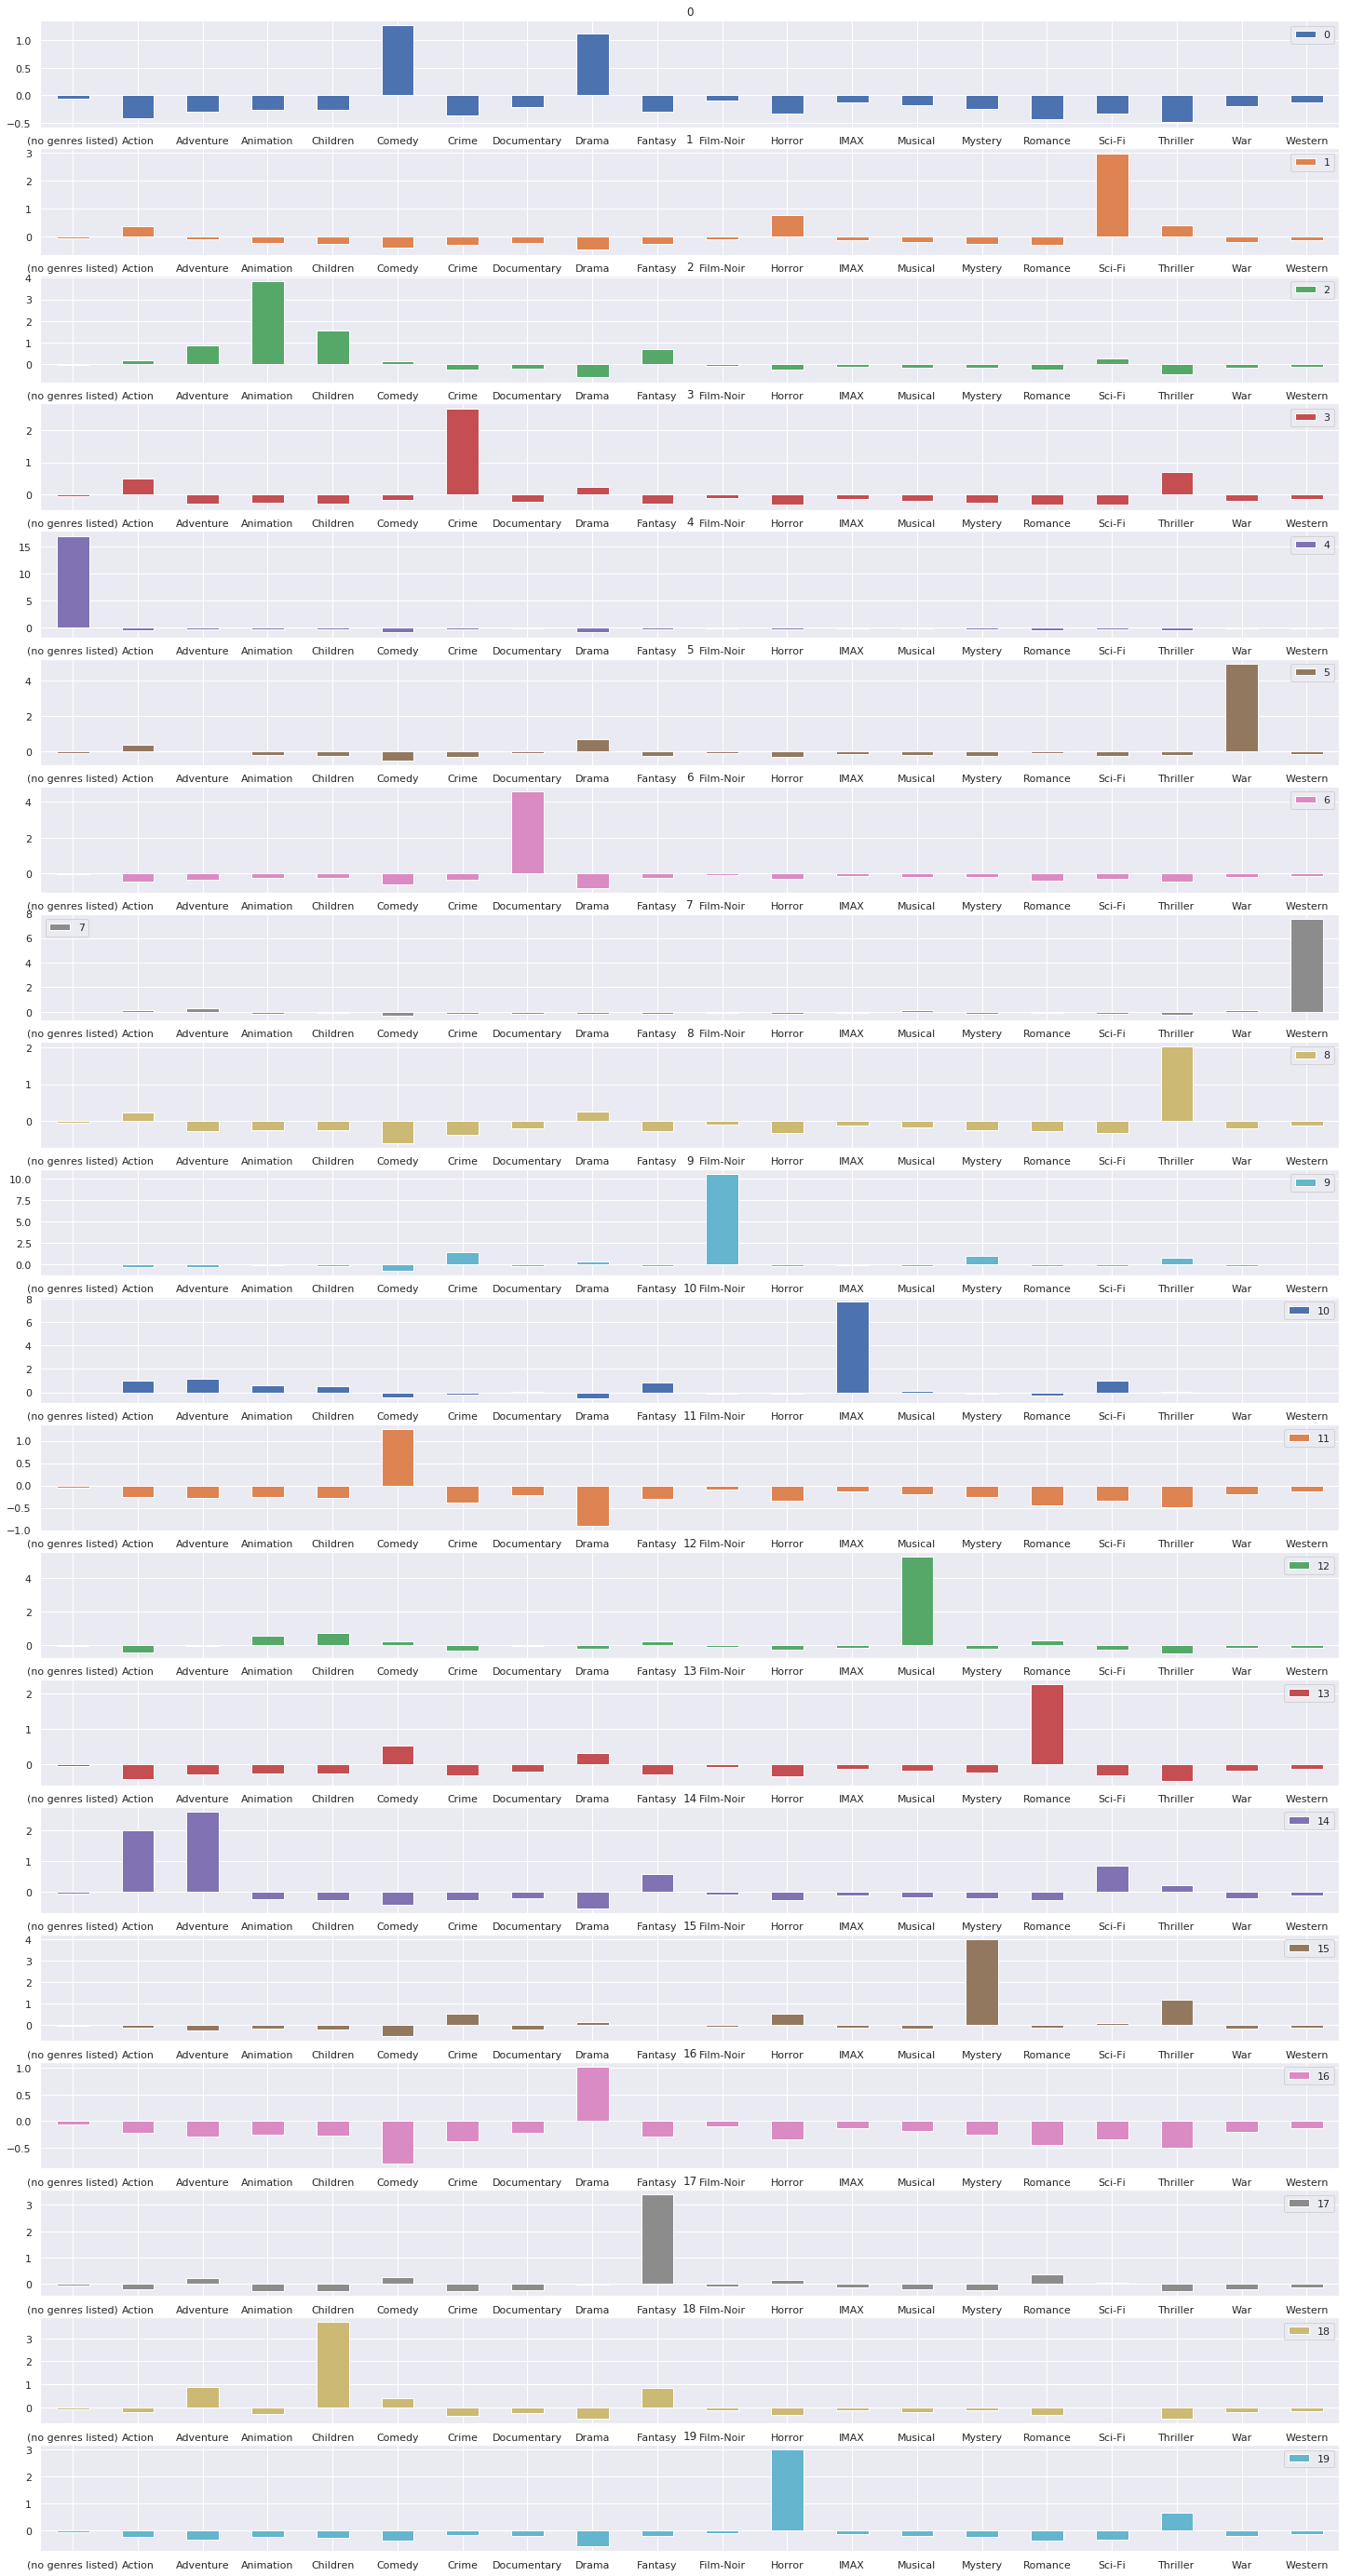

In [0]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)